### Problem Statement

A. ● Users - Info about Memrise users gathered at time of signup

○ user_id - randomised representation for a user

○ country - the country associated with the user’s account

○ signup_app - the app used to sign up (memrise_[android/ios/web])

○ signup_time - the time when the user signed up


B. ● Learning sessions - A string of tests, can be of different types

○ user_id - same as above

○ learning_session_id - unique ID for the learning session

○ learning_session_type - the type of learning session

○ app - same as signup_app above

○ num_tests - the number of questions the user answered in this session

○ total_score - the total score for the session (score for each test is 0 - incorrect, 1 -
correct)

○ start_time

○ completion_time

○ duration_mins - total time in minutes, excluding periods of inactivity

C. ● Subscriptions

○ user_id - same as above

○ period_month - the subscription period in months, ie 12 means yearly
subscription

○ action - can be ‘trial_started’ or ‘started’ (user subscribes without trial)

○ action_time - the timestamp when the user subscribed

Questions:

Given this data, your task is to analyse it and present some observations about the different
data points. For example:

● How do the different data points relate to each other?

● Can you identify any groups of users based on their attributes? How do they differ?

● Do some users, or groups, seem to have a better learning performance than others?

● Are you able to predict the accuracy of a learning session? How confident are you with
the prediction?



### Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

#### Loading the dataset

In [2]:
learnings = pd.read_csv('./memrise_analytical_task/learning_sessions.csv', low_memory=False)
subscriptions = pd.read_csv('./memrise_analytical_task/subscriptions.csv')
users = pd.read_csv('./memrise_analytical_task/users.csv')

In [3]:
learnings = learnings.rename(index=None, columns={" learning_session_type": "learning_session_type", " total_score": "total_score"," num_tests":"num_tests"," app":"app"," start_time":"start_time"," duration_mins":"duration_mins"," completion_time":"completion_time"}) 

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
learnings.describe()

,total_score,num_tests,duration_mins
count,1941320.000,1941320.000,1941320.000
mean,12.391,13.213,1.540
std,31.395,8.935,1.260
min,0.000,1.000,0.000
25%,9.000,9.000,0.783
50%,12.000,13.000,1.283
75%,14.000,15.000,1.950
max,8650.000,200.000,36.683


In [6]:
subscriptions.describe()

,period_months
count,2667.000
mean,10.306
std,3.870
min,1.000
25%,12.000
50%,12.000
75%,12.000
max,12.000


In [7]:
users.describe()

,user_id,country,signup_app,signup_time
count,230021,222348,229578,230021
unique,230021,204,3,189553
top,d81be8b2669947749e815c168209ee54,USA,memrise-android,2018-02-15 15:34:46.000000
freq,1,35845,145075,6


### Checking about the null rows in the datasets

In [8]:
learnings.isnull().sum().reset_index()

,index,0
0,user_id,0
1,learning_session_id,0
2,learning_session_type,0
3,app,0
4,total_score,180131
5,num_tests,180131
6,start_time,0
7,completion_time,347612
8,duration_mins,180131


In [9]:
subscriptions.isnull().sum().reset_index()

,index,0
0,user_id,0
1,period_months,33
2,action,0
3,action_time,0


In [10]:
users.isnull().sum().reset_index()

,index,0
0,user_id,0
1,country,7673
2,signup_app,443
3,signup_time,0


### Dropping the NaN values since its not significant amount of information

In [11]:
learnings = learnings.dropna()
subscriptions = subscriptions.dropna()
users = users.dropna()

### Score Distribution of users

This shows us the user distribution in the score range.

In [12]:
score_distribution = pd.DataFrame(learnings['total_score'].value_counts()).reset_index()
score_distribution = score_distribution.rename(index=None, columns={"index": "score_obtained", "total_score": "user_count"})
score_distribution = score_distribution.sort_values(['user_count'], ascending = False).reset_index(drop=True)

Top 40 Score distribution of users


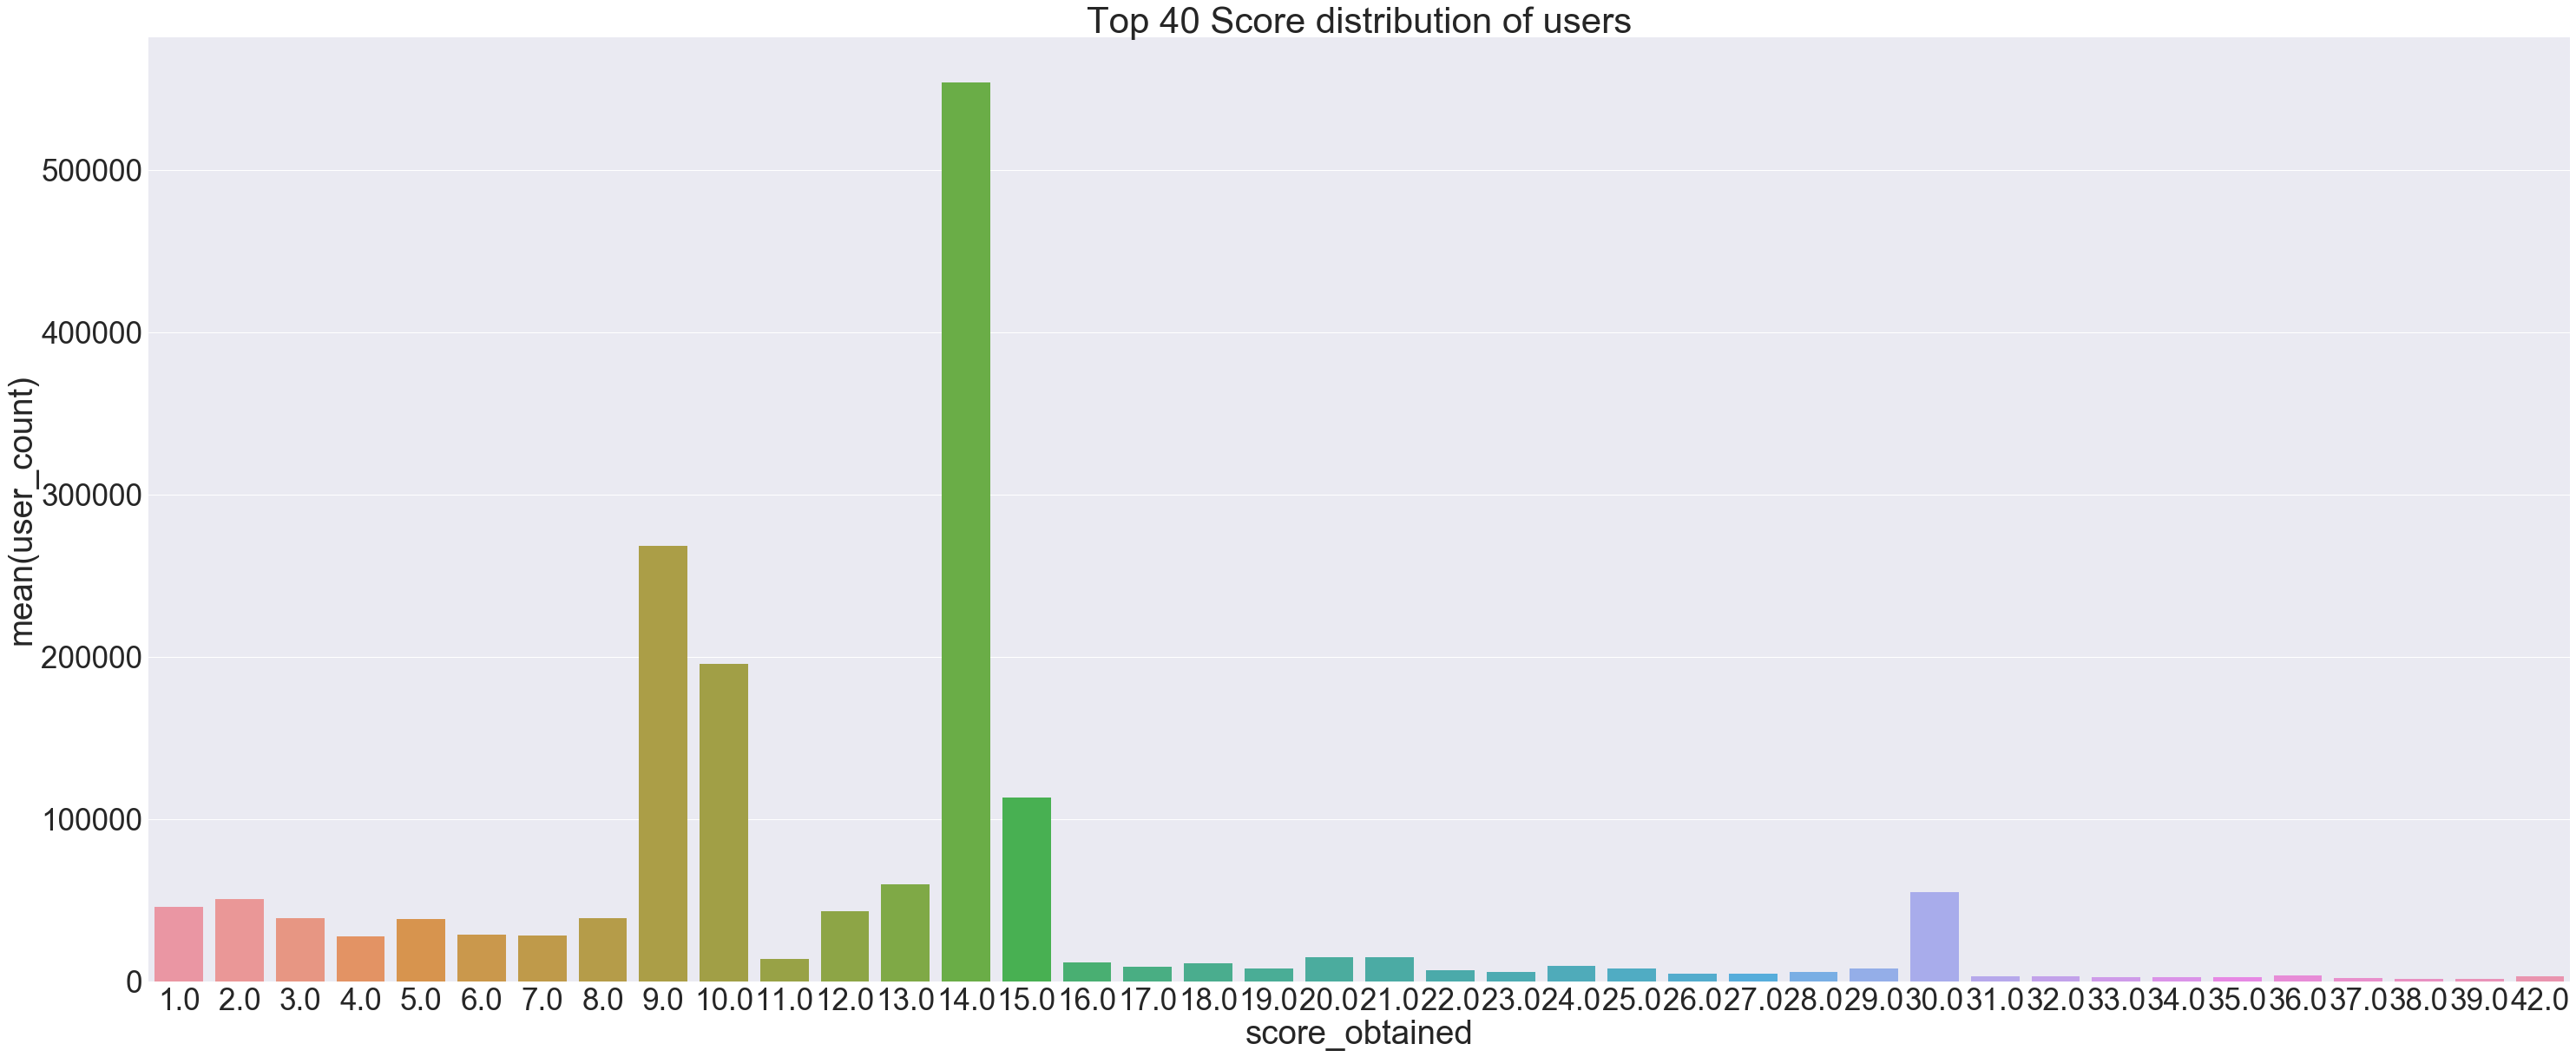

In [162]:
plt.figure(figsize=(50,20))
sns.set(font_scale=3.5)
print("Top 40 Score distribution of users")
plt.title("Top 40 Score distribution of users")
sns.barplot(x = 'score_obtained' , y = 'user_count',data = score_distribution[:40])

In [14]:
score_stats = learnings.groupby(['num_tests'])['total_score'].agg(['count','mean','median','max','min']).reset_index()

In [15]:
score_stats.head()

,num_tests,count,mean,median,max,min
0,1.000,37204,0.995,1.000,65.000,0.000
1,2.000,44089,1.815,2.000,2.000,0.000
2,3.000,39070,2.678,3.000,3.000,0.000
3,4.000,28567,3.444,4.000,4.000,0.000
4,5.000,32530,4.670,5.000,2278.000,0.000


### How does scores project with increase of test number ?

We can see below that with the progress of the number of tests, test scores have significantly improved over time for the users. 

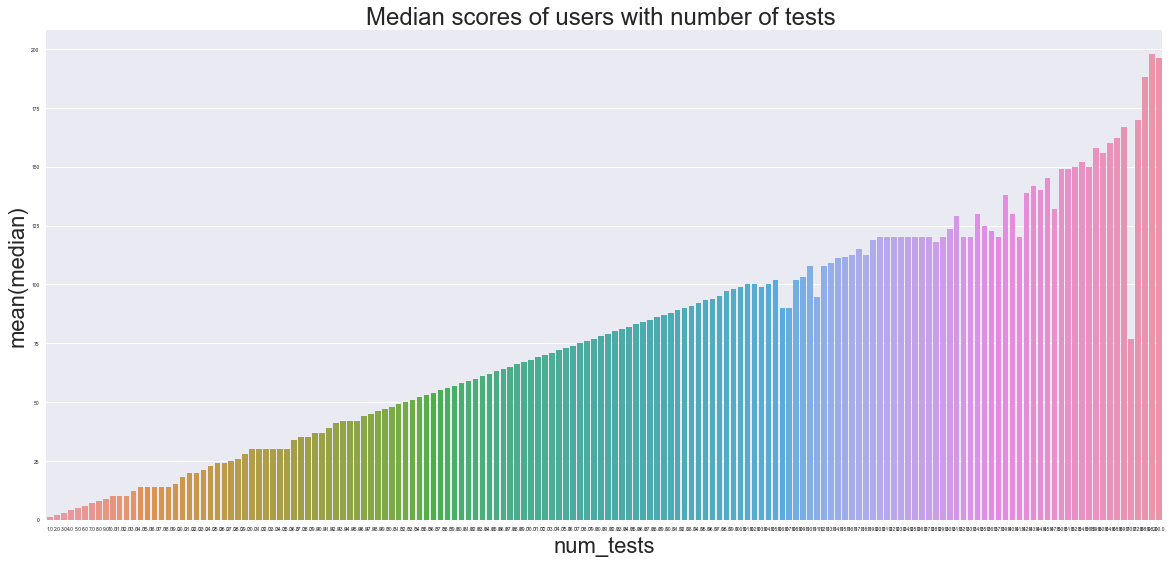

In [211]:
plt.figure(figsize=(20,9))
sns.set(font_scale=2)
plt.title('Median scores of users with number of tests ')
sns.barplot(x='num_tests' ,y='median',data=score_stats[:]).tick_params(labelsize=5)

### User Distribution per learning session type

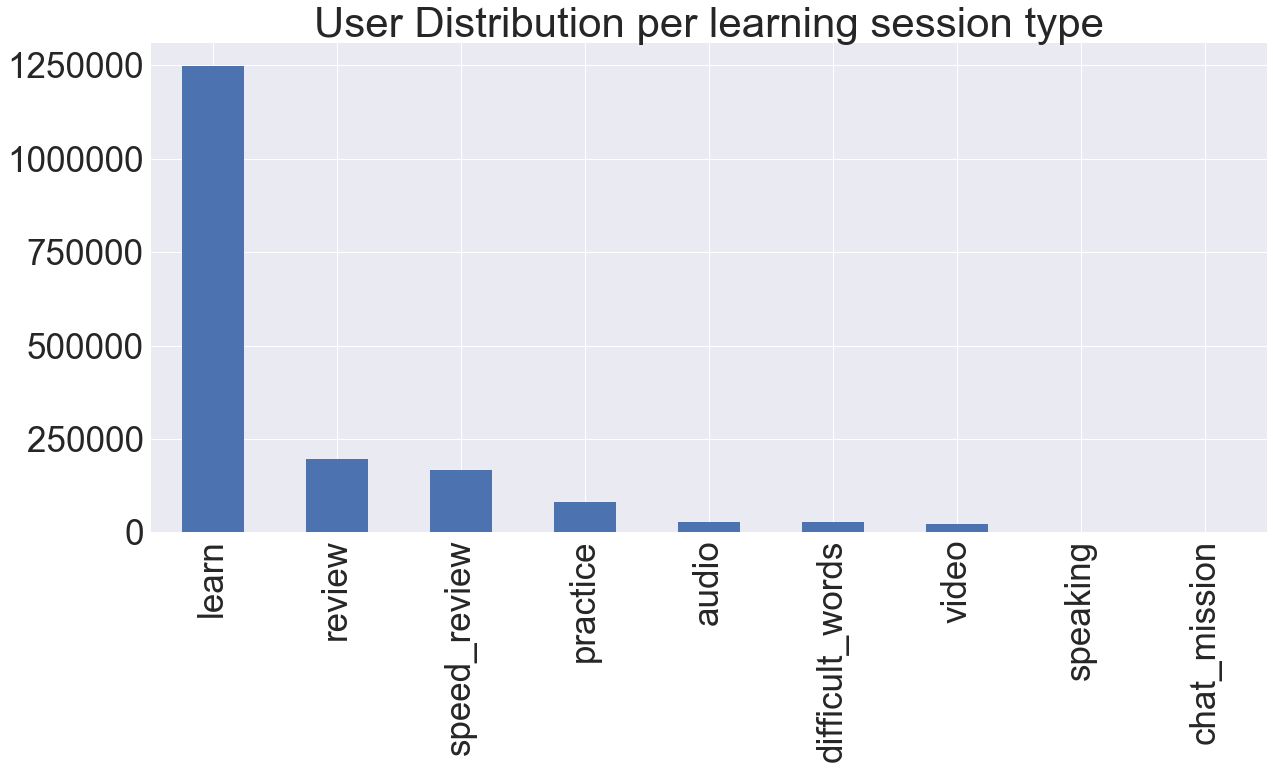

In [167]:
plt.figure(figsize=(20,9))
plt.rcParams.update({'font.size': 10})
plt.title("User Distribution per learning session type")
learnings['learning_session_type'].value_counts().plot(kind='bar')

In [18]:
score = learnings['total_score'] 

In [19]:
print(" The null hypothesis being number of tests doesn't affect scoring, \n and the alternate hypothesis being, number of tests does affect scoring")
true_mu = 13
print('\n P-value -->',(stats.ttest_1samp(score, true_mu)[1]),'\n')
print(' As we can see from the p-value that our null hypothesis is rejected stating that, \n with increase of tests, scoring improves')

 The null hypothesis being number of tests doesn't affect scoring, 
 and the alternate hypothesis being, number of tests does affect scoring

 P-value --> 3.67119089533e-08 

 As we can see from the p-value that our null hypothesis is rejected stating that, 
 with increase of tests, scoring improves


### Box Plots to give a comparitive study of learning types in different mediums

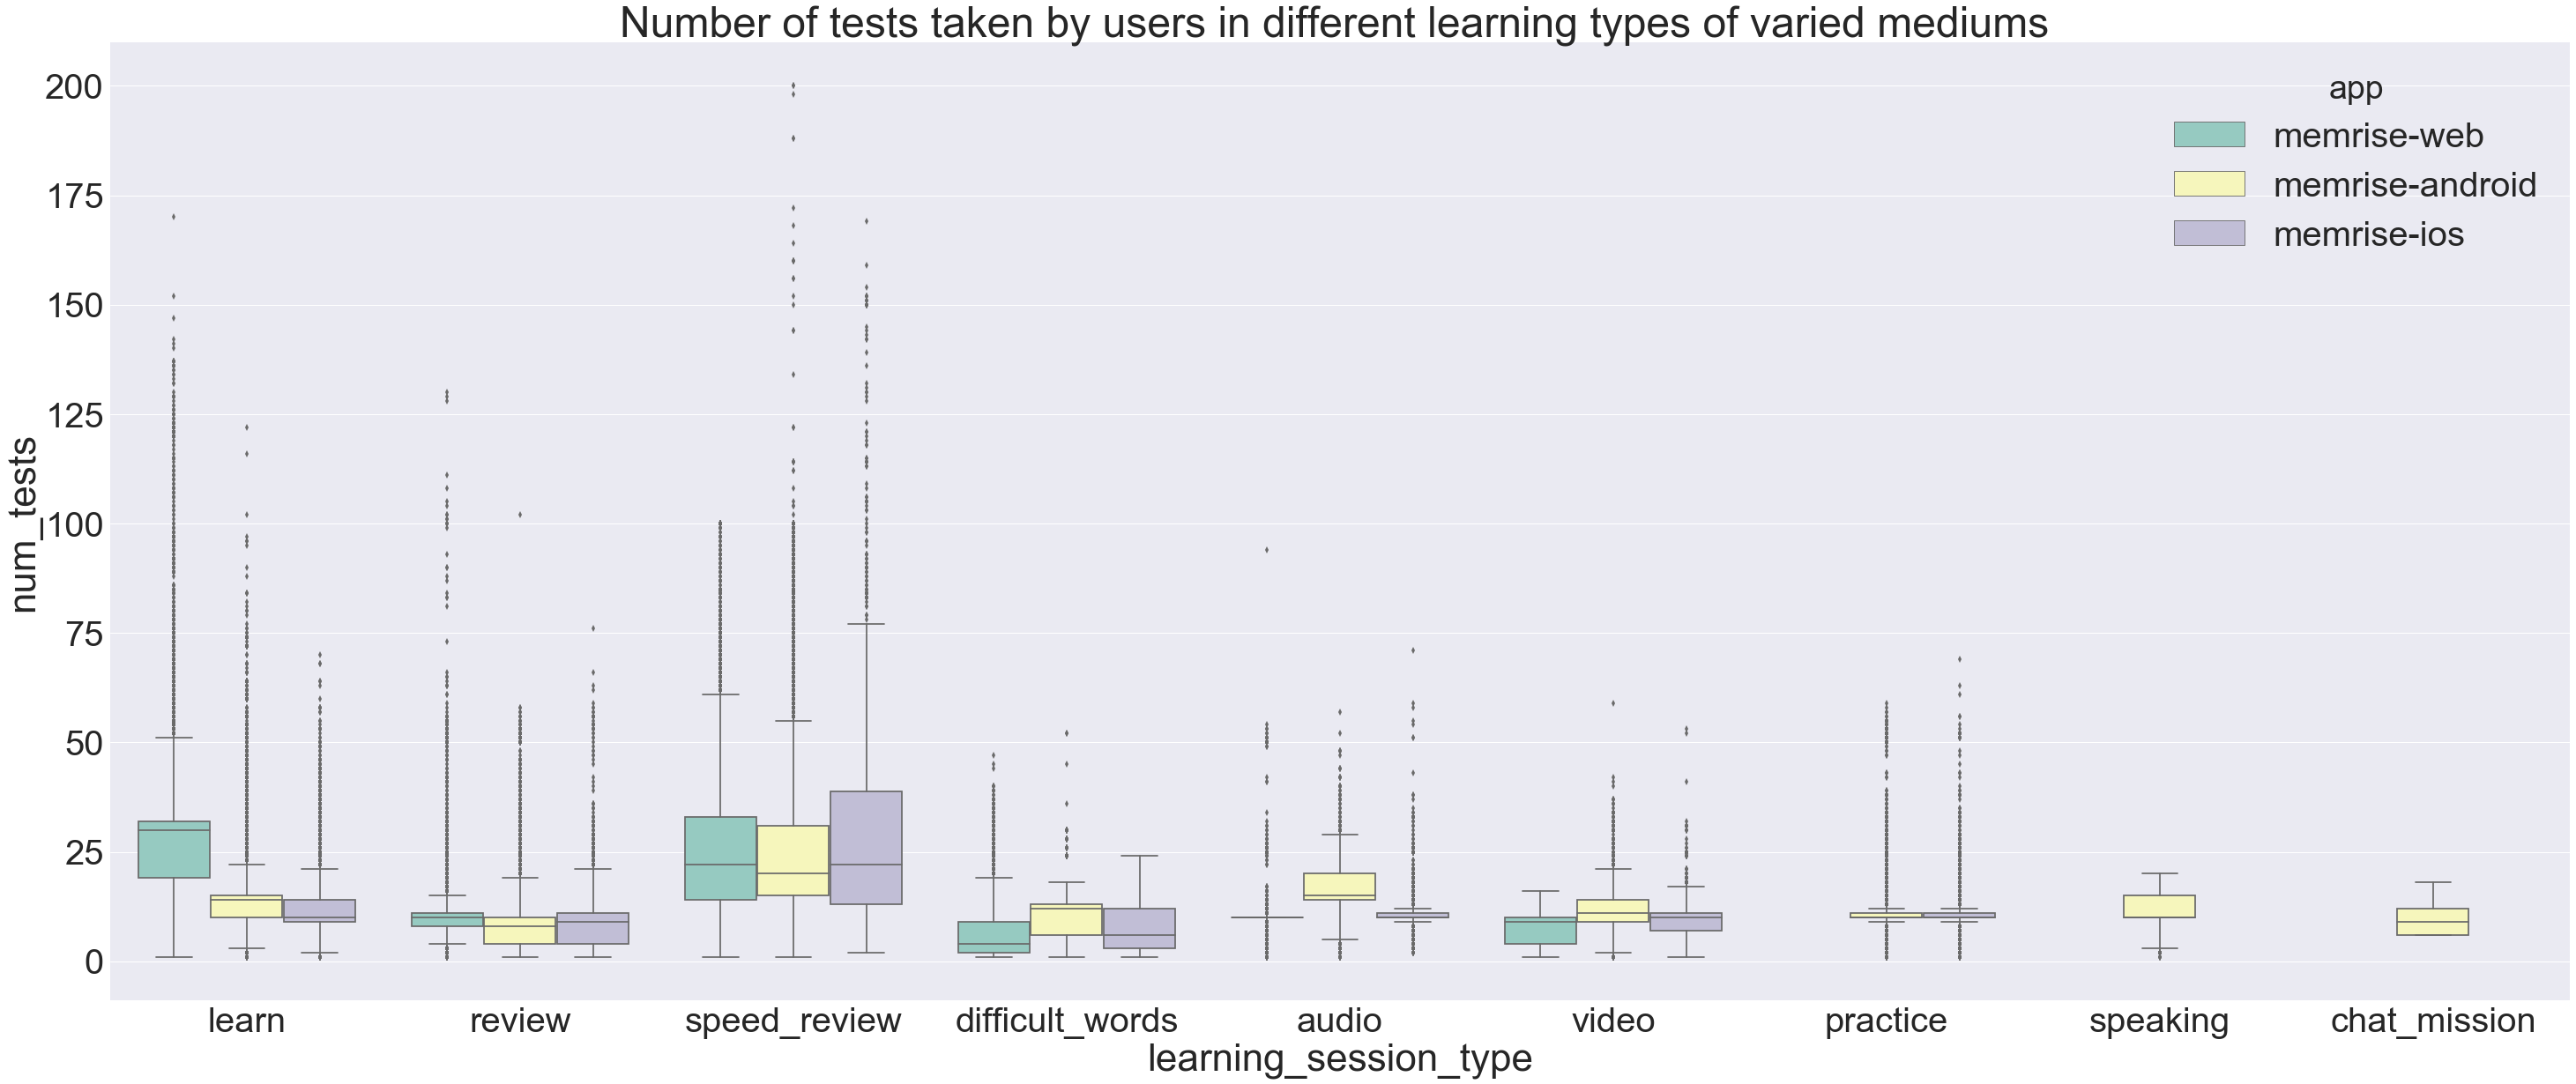

In [212]:
plt.figure(figsize=(50,20))
sns.set(font_scale=4)
plt.title('Number of tests taken by users in different learning types of varied mediums ')
sns.boxplot(x='learning_session_type',y='num_tests',hue='app',data= learnings, palette='Set3')

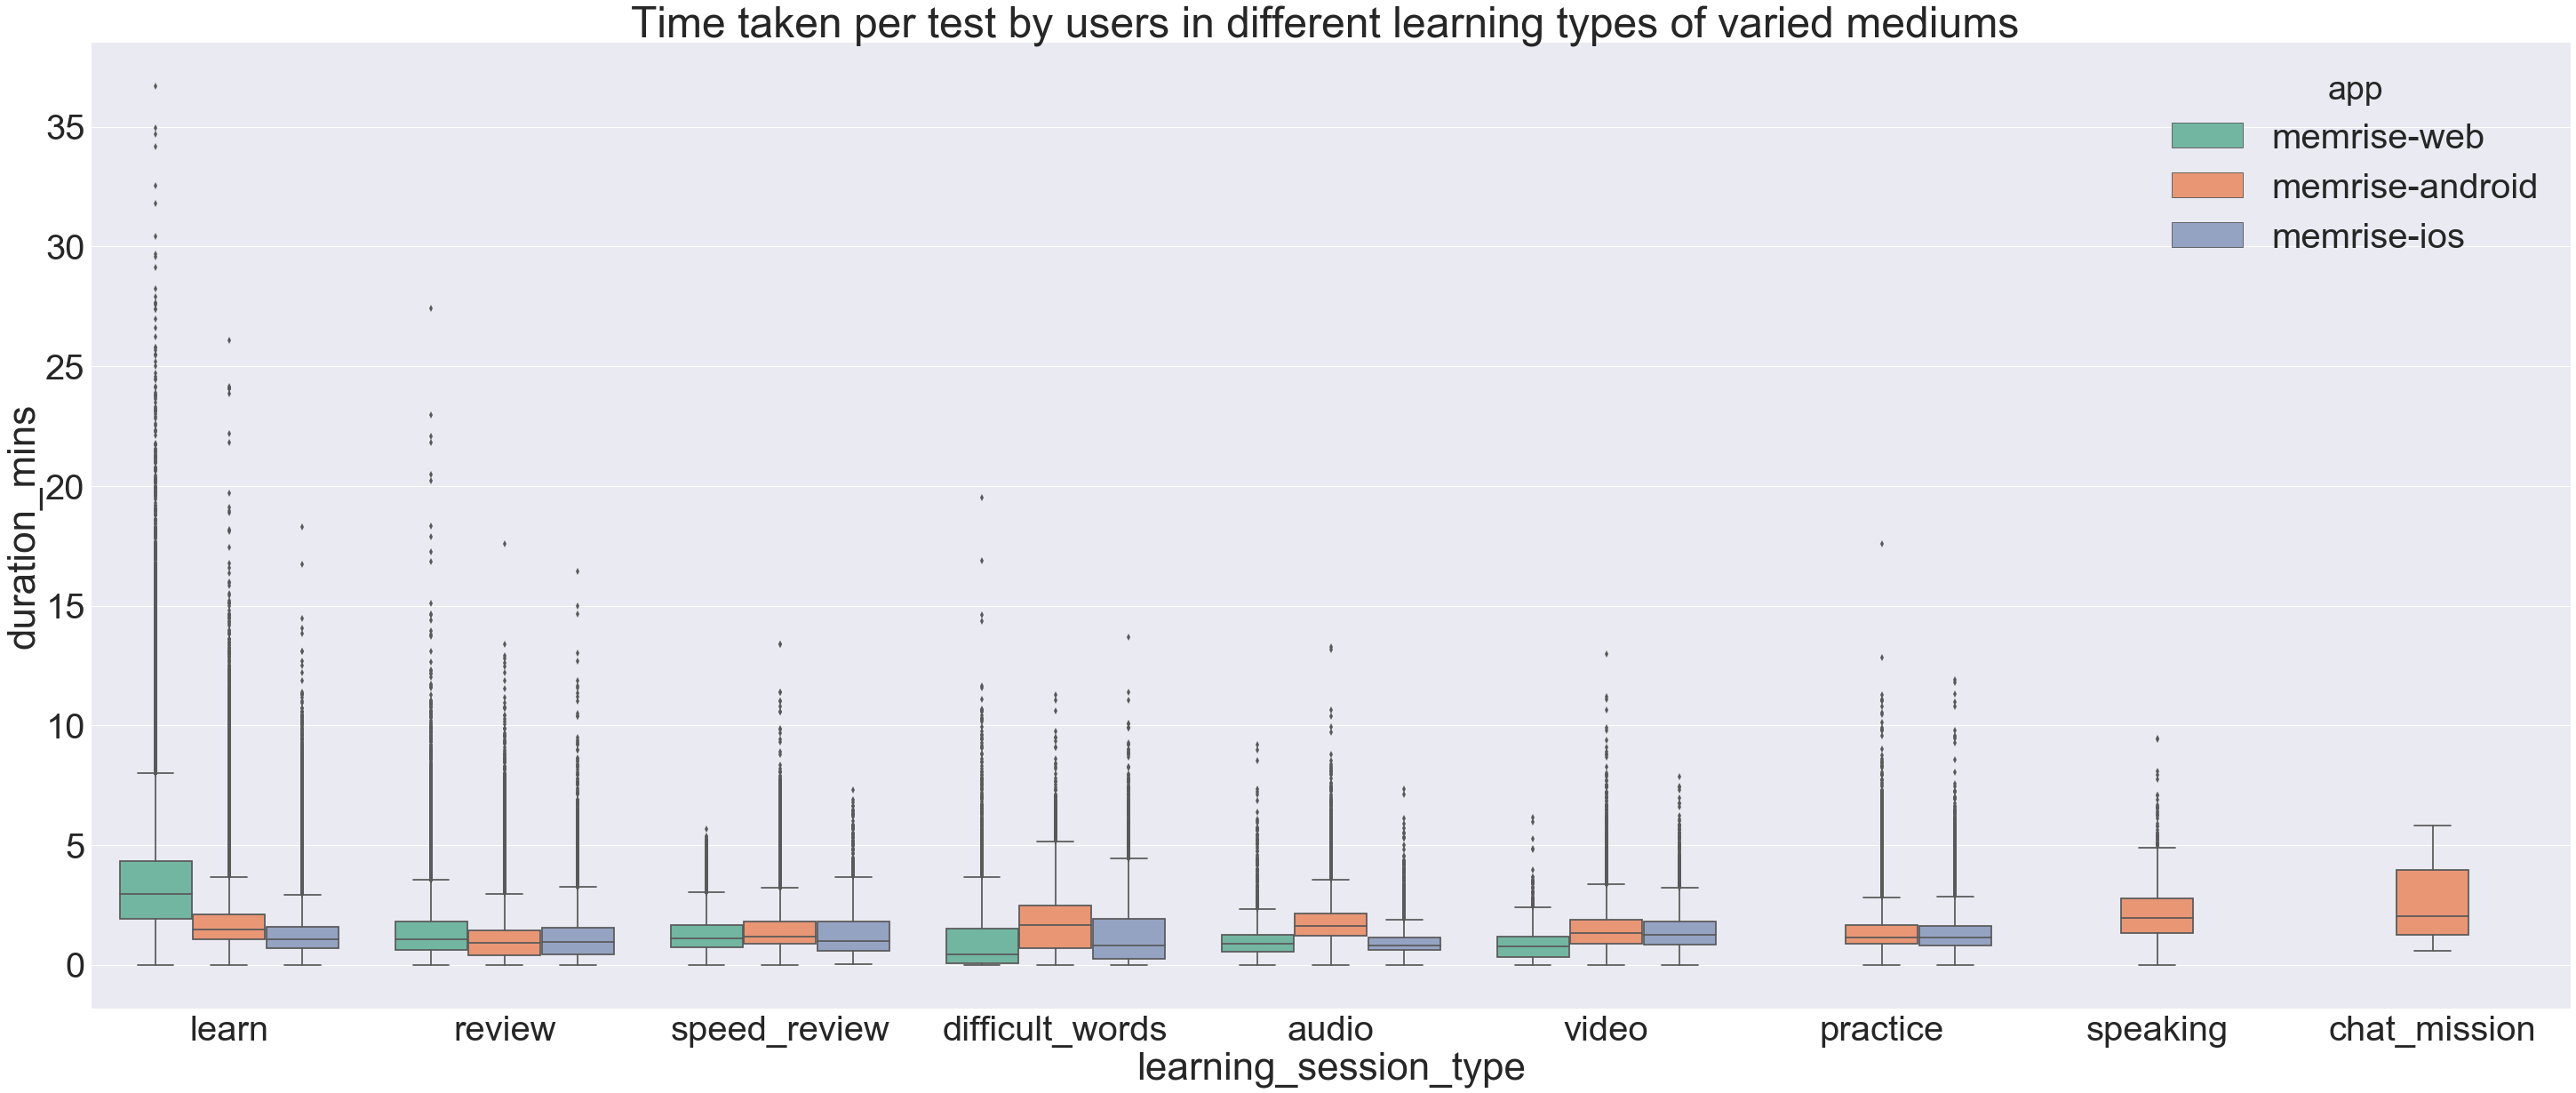

In [213]:
plt.figure(figsize=(50,20))
sns.set(font_scale=4)
plt.title('Time taken per test by users in different learning types of varied mediums ')
sns.boxplot(x='learning_session_type',y='duration_mins',hue='app',data= learnings, palette='Set2')

### Segregating Users by Learning Session Type

In [22]:
type_learn = learnings[learnings['learning_session_type']=='learn']

type_chat_mission = learnings[learnings['learning_session_type']=='chat_mission']

type_difficult_words = learnings[learnings['learning_session_type']=='difficult_words']

type_audio = learnings[learnings['learning_session_type']=='audio']

type_practice = learnings[learnings['learning_session_type']=='practice']

type_review = learnings[learnings['learning_session_type']=='review']

type_speaking = learnings[learnings['learning_session_type']=='speaking']

type_speed_review = learnings[learnings['learning_session_type']=='speed_review']

type_video = learnings[learnings['learning_session_type']=='video']


### Learning Stats hypothesis testing

### Hypothesis Testing: Case I:  Test Scores of different Groups

Using Kruskal Wallis test because to test amongst the different groups having a lot of outliers, and a non parametric
distribution, Mann Whitney is the preferred choice. 

The chi-squared value to detect null hypothesis in Kruskal Wallis is 15.5, for .05 alpha.

In [23]:
stats.kruskal((type_learn['total_score']), (type_chat_mission['total_score']), (type_difficult_words['total_score']),
               (type_audio['total_score']), (type_practice['total_score']), (type_review['total_score']),
               (type_speaking['total_score']), (type_speed_review['total_score']), (type_video['total_score'])
              )

KruskalResult(statistic=400035.25203830568, pvalue=0.0)

### Hypothesis Testing: Case II:  Num Tests of different Groups

In [24]:
stats.kruskal(type_learn['num_tests'], type_chat_mission['num_tests'], type_difficult_words['num_tests'],
               type_audio['num_tests'], type_practice['num_tests'], type_review['num_tests'],
               type_speaking['num_tests'], type_speed_review['num_tests'], type_video['num_tests']
              )

KruskalResult(statistic=380004.51368866902, pvalue=0.0)

### Hypothesis Testing Case III: Duration Mins tests of different Groups

In [25]:
stats.kruskal(type_learn['duration_mins'], type_chat_mission['duration_mins'], type_difficult_words['duration_mins'],
               type_audio['duration_mins'], type_practice['duration_mins'], type_review['duration_mins'],
               type_speaking['duration_mins'], type_speed_review['duration_mins'], type_video['duration_mins']
              )

KruskalResult(statistic=68179.158714995545, pvalue=0.0)

### Linking learnings to Countries

In [26]:
countries_learnings = learnings.merge(users, on='user_id', how='left')

In [27]:
countries_learnings = countries_learnings.dropna()

### Are the top most 5 active countries have significant learning differences between the least 5 countries ?

In [28]:
users_signups_country = users.groupby(['country'])['signup_app'].count().reset_index()
users_signups_country = users_signups_country.sort_values(['signup_app'], ascending = False).reset_index(drop=True)

In [29]:
print("Top 5 countries by signups \n\n" ,users_signups_country[:5])
print("\nLast 5 countries by signups \n\n" ,users_signups_country[-5:])

Top 5 countries by signups 

   country  signup_app
0     USA       35783
1     BRA       14927
2     GBR       14231
3     RUS       12111
4     TUR       11892

Last 5 countries by signups 

     country  signup_app
199     BLM           1
200     CAF           1
201     SMR           1
202     GUF           1
203     SLE           1


In [30]:
top_5_countries = countries_learnings.loc[(countries_learnings['country'] == 'USA') | (countries_learnings['country'] == 'BRA')|
                                          (countries_learnings['country'] == 'GBR') | (countries_learnings['country'] == 'RUS')|
                                          (countries_learnings['country'] == 'TUR')
                                         ]

In [31]:
last_5_countries = countries_learnings.loc[(countries_learnings['country'] == 'BLM') | (countries_learnings['country'] == 'CAF')|
                                          (countries_learnings['country'] == 'SMR') | (countries_learnings['country'] == 'GUF')|
                                          (countries_learnings['country'] == 'SLE')
                                         ]

### Signup by medium of Top 5 countries vs Last 5 countries 

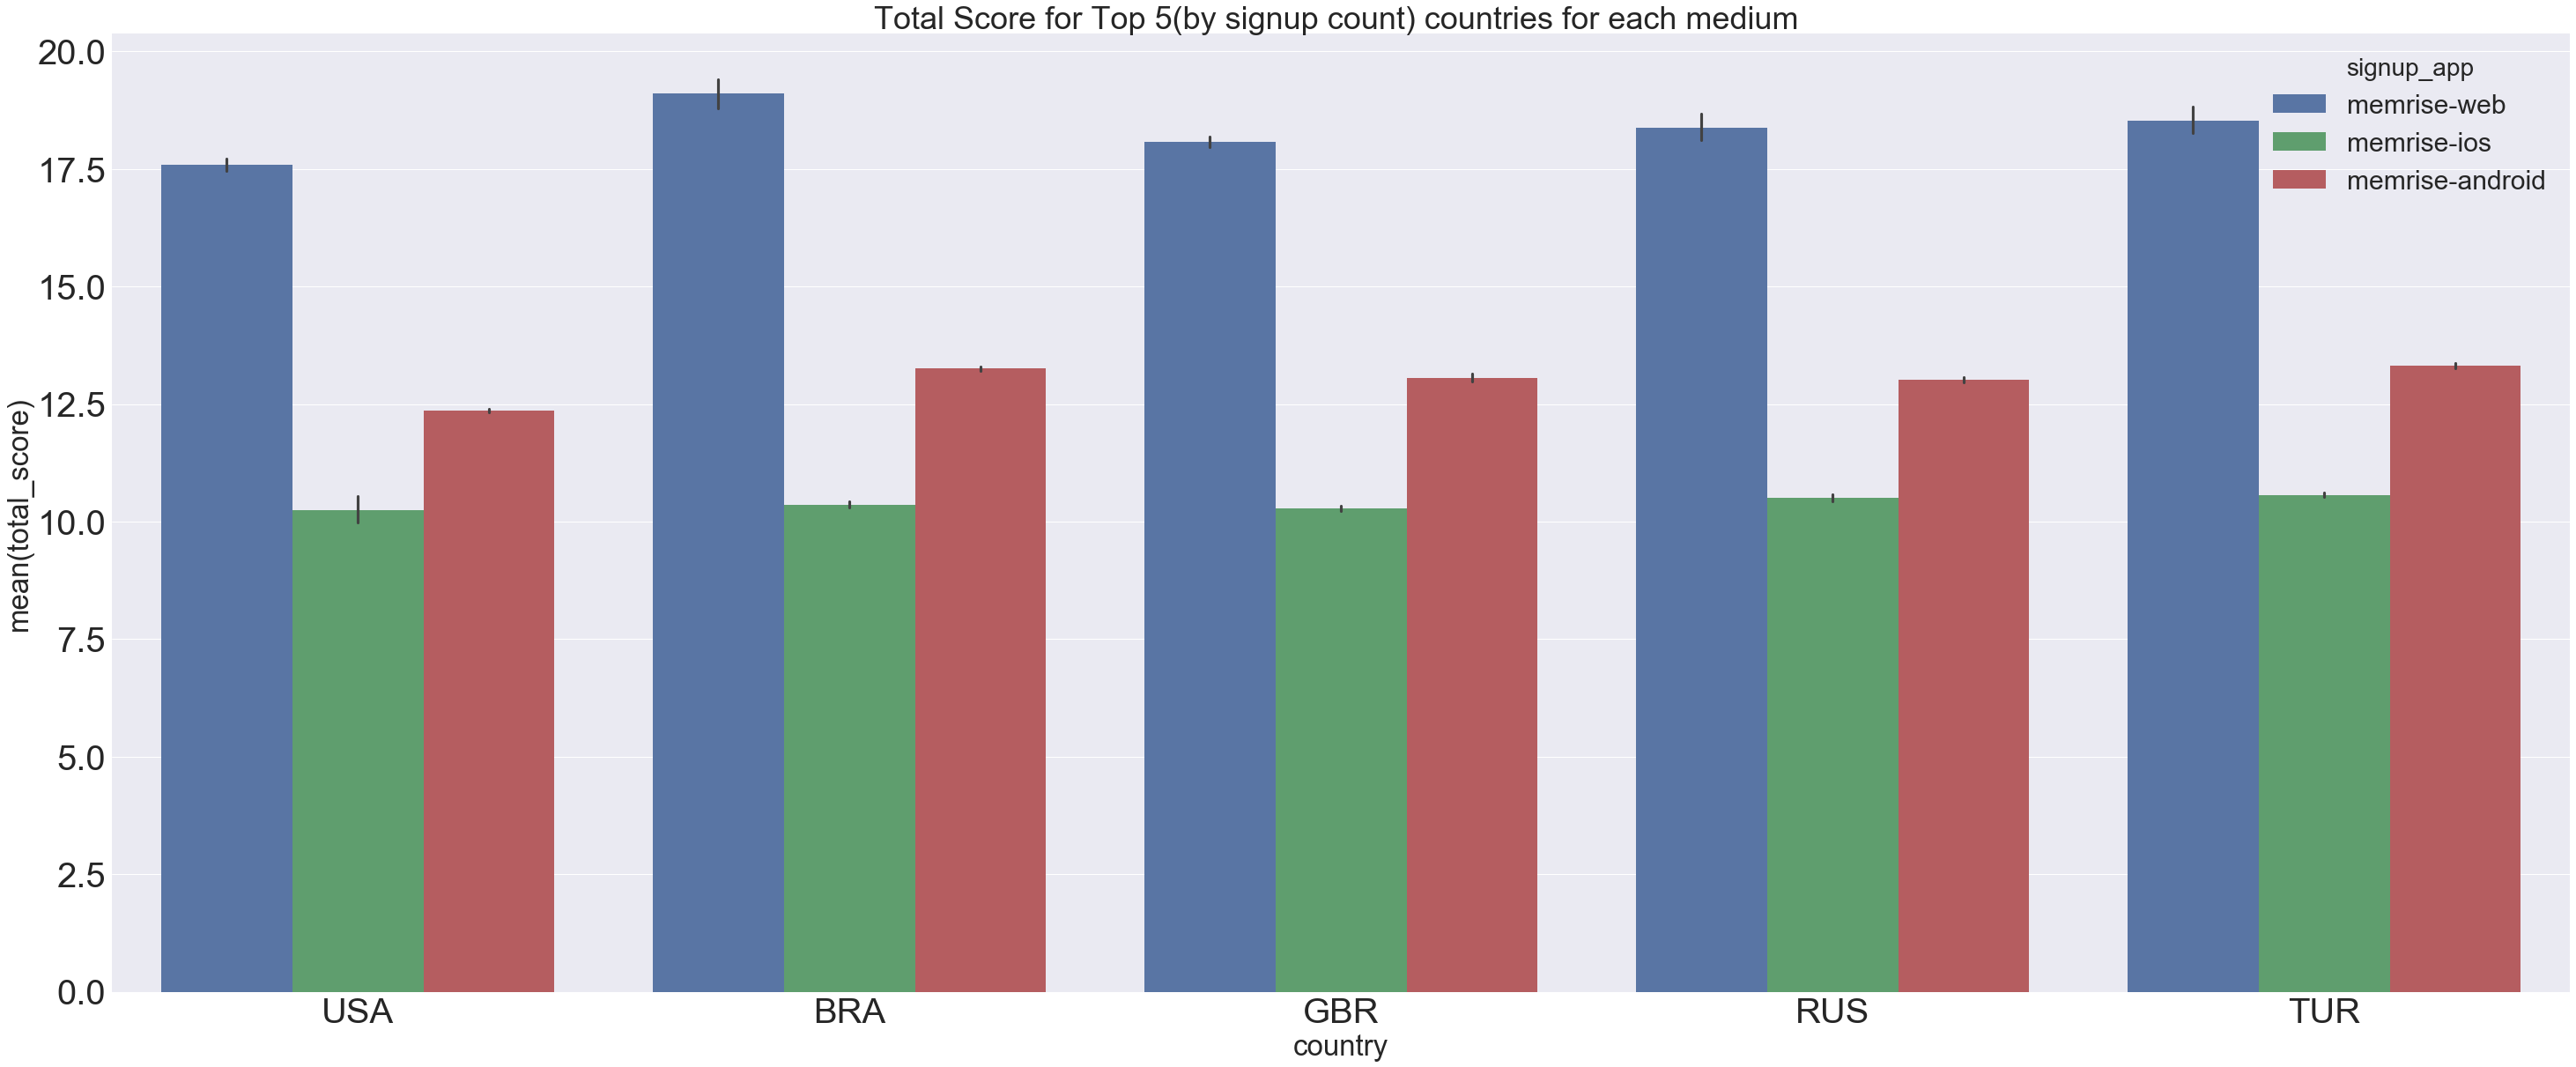

In [220]:
plt.figure(figsize=(50,20))
sns.set(font_scale=3)
plt.title('Total Score for Top 5(by signup count) countries for each medium ')
sns.barplot(y='total_score', x='country', hue='signup_app', data=top_5_countries).tick_params(labelsize=40)

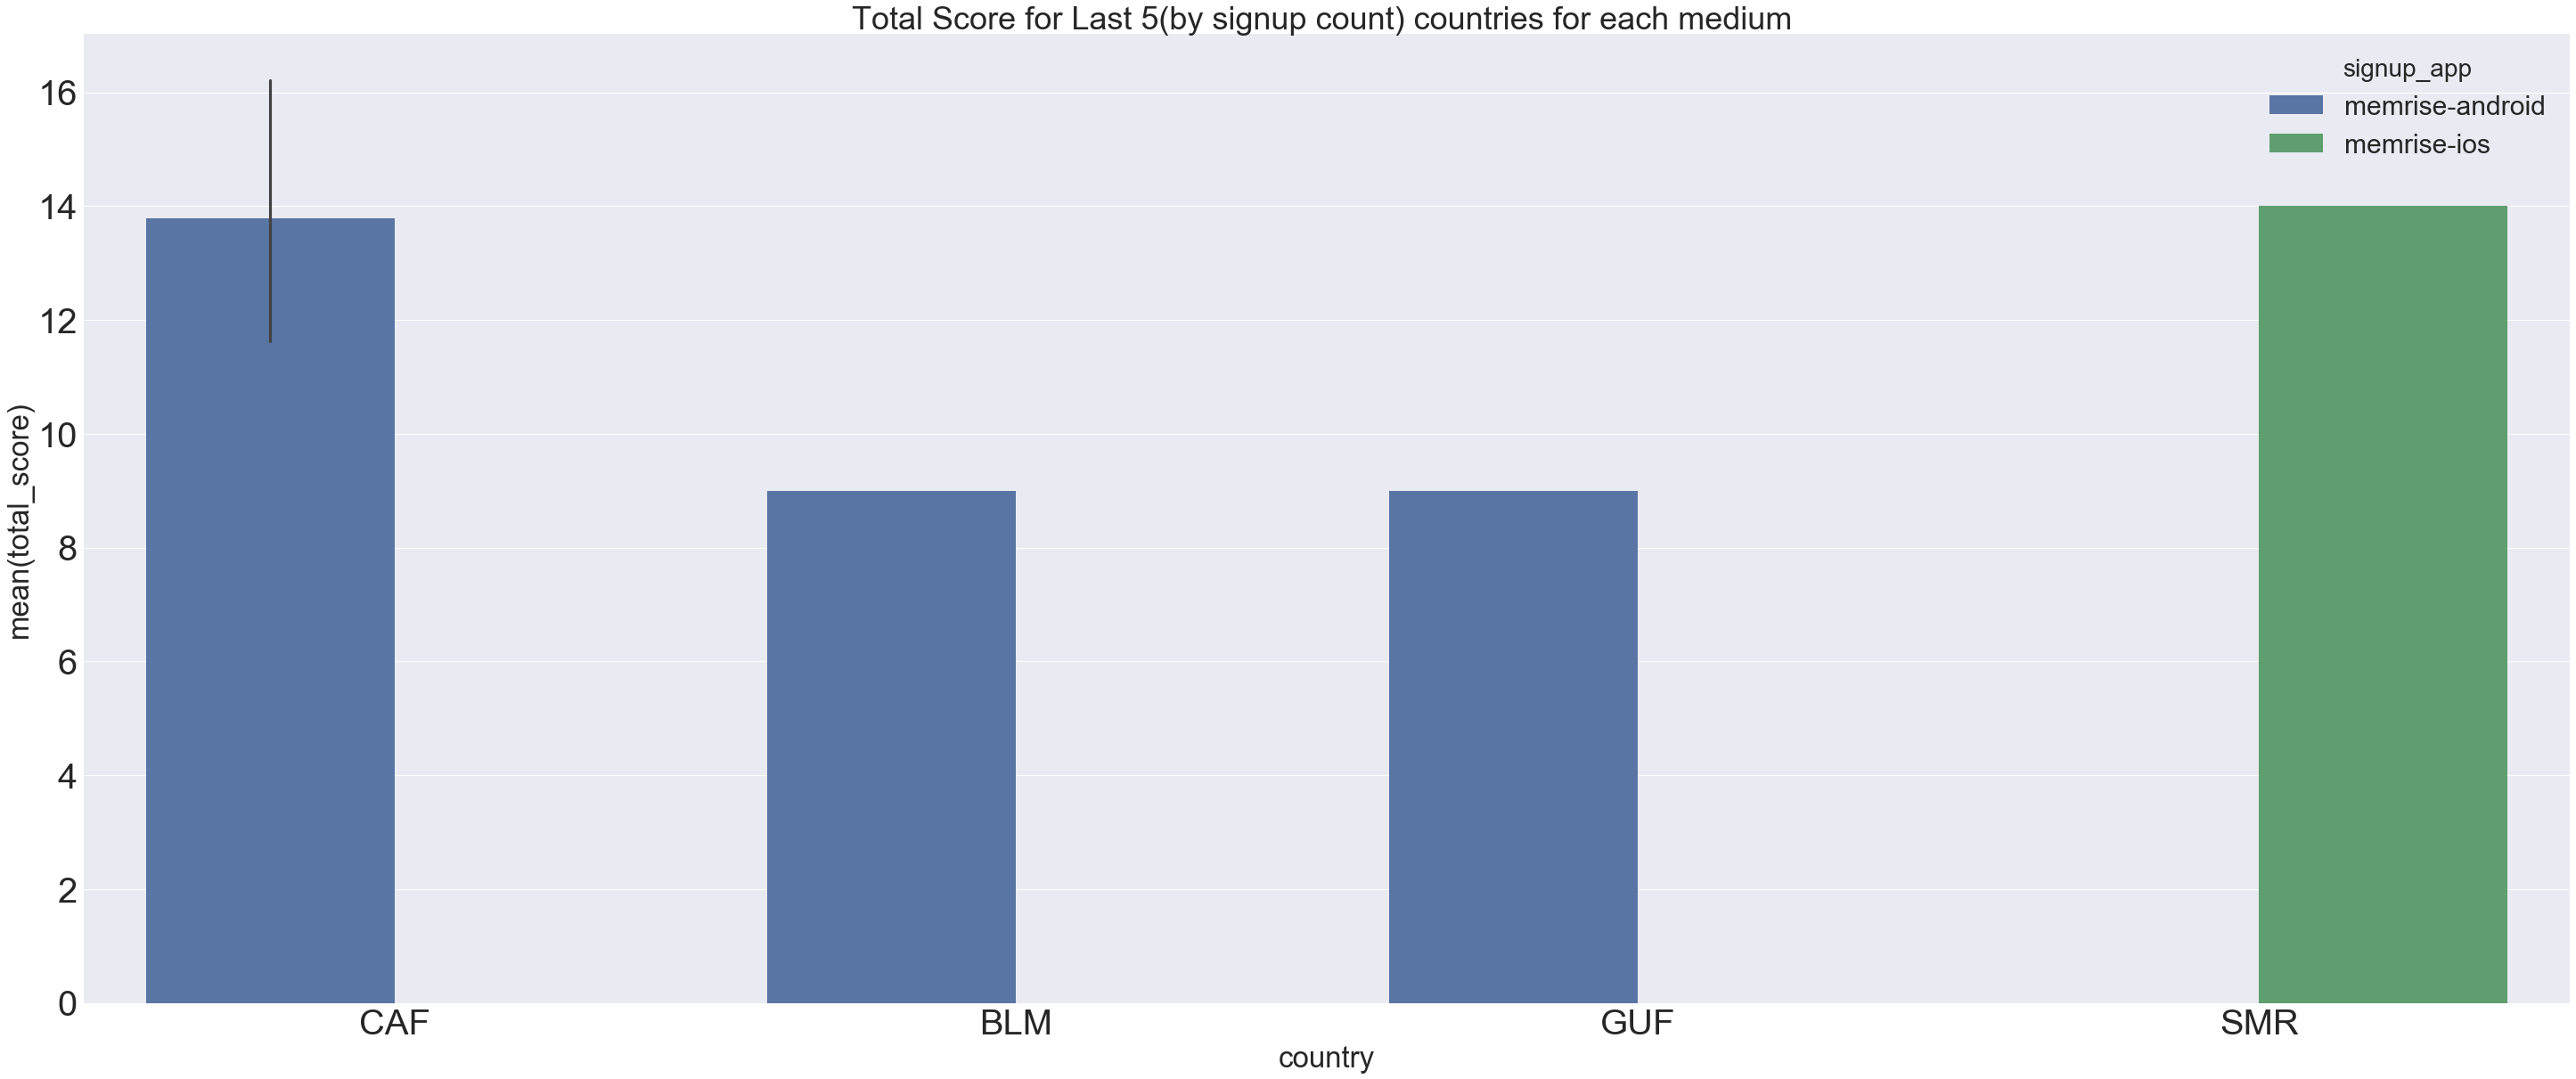

In [221]:
plt.figure(figsize=(50,20))
sns.set(font_scale=3)
plt.title('Total Score for Last 5(by signup count) countries for each medium ')
sns.barplot(y='total_score', x='country', hue='signup_app', data=last_5_countries).tick_params(labelsize=40)

### Hypothesis Testing I: Is the total score performance significantly different for the top 5 and last 5 countries

In [41]:
stats.kruskal(top_5_countries['total_score'], last_5_countries['total_score'])

KruskalResult(statistic=1.8891384326105618, pvalue=0.16929912992235271)

### Hypothesis Testing II: Is the number of tests done significantly different for the top 5 and last 5 countries

In [42]:
stats.kruskal(top_5_countries['num_tests'], last_5_countries['num_tests'])

KruskalResult(statistic=1.012222755280072, pvalue=0.31437092393056698)

### Hypothesis Testing III: Is the duration spent for tests significantly different for the top 5 and last 5 countries

In [43]:
stats.kruskal(top_5_countries['duration_mins'], last_5_countries['duration_mins'])

KruskalResult(statistic=0.051219975281034856, pvalue=0.82095386219887589)

### Learning session comparison for the users of the top 5 countries

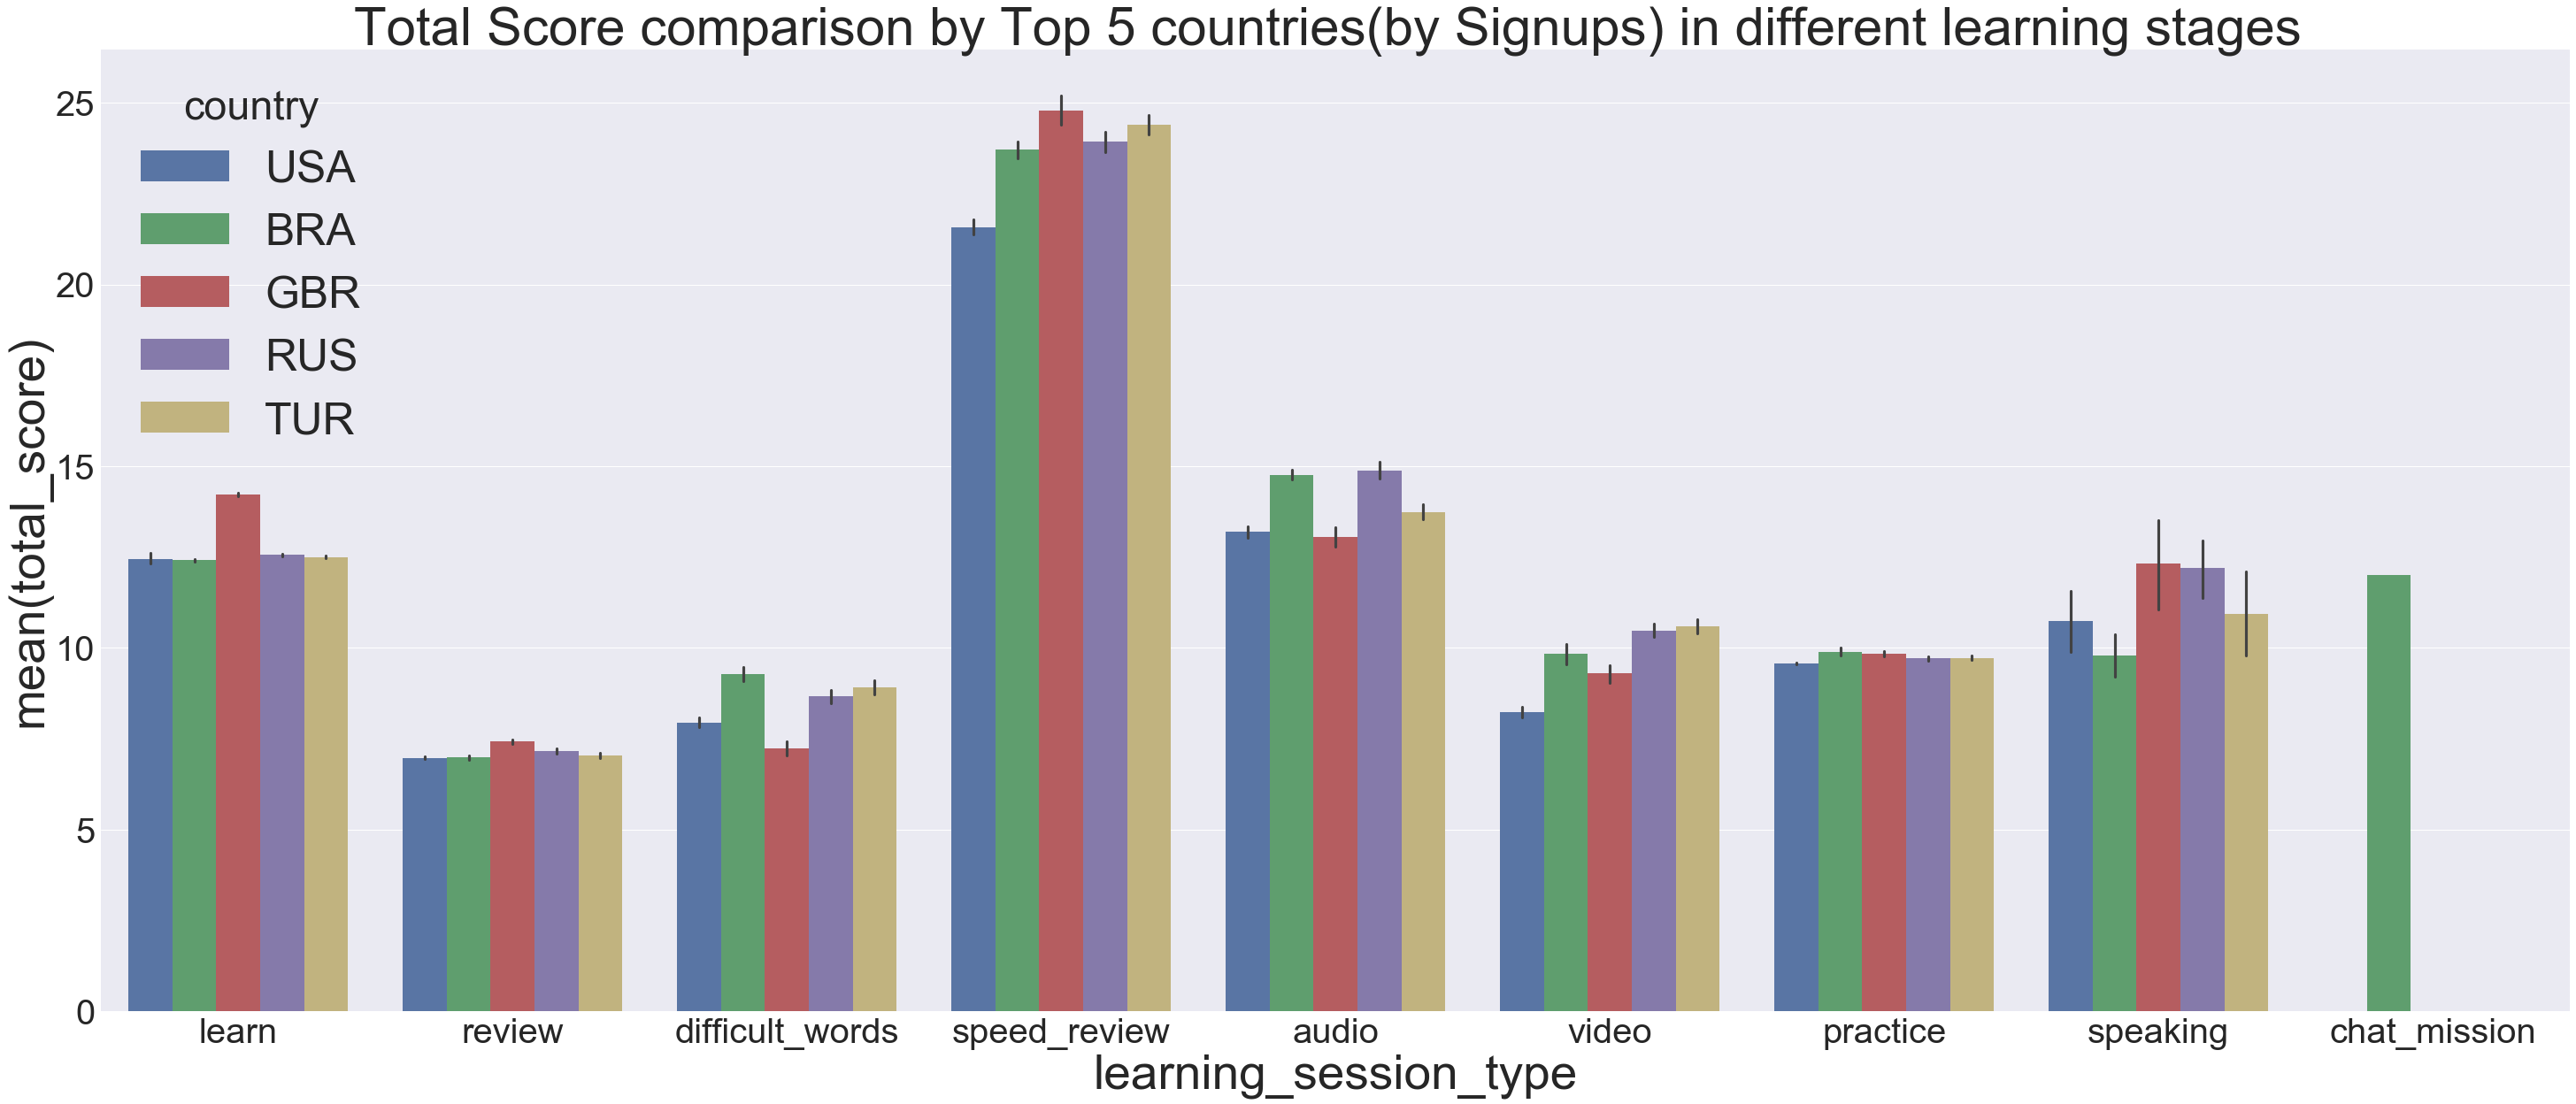

In [219]:
plt.figure(figsize=(50,20))
plt.title('Total Score comparison by Top 5 countries(by Signups) in different learning stages ')
sns.set(font_scale=5)
sns.barplot(y='total_score', x='learning_session_type', hue='country', data=top_5_countries).tick_params(labelsize=40)

### Learning Session comparison of the users of the last 5 countries

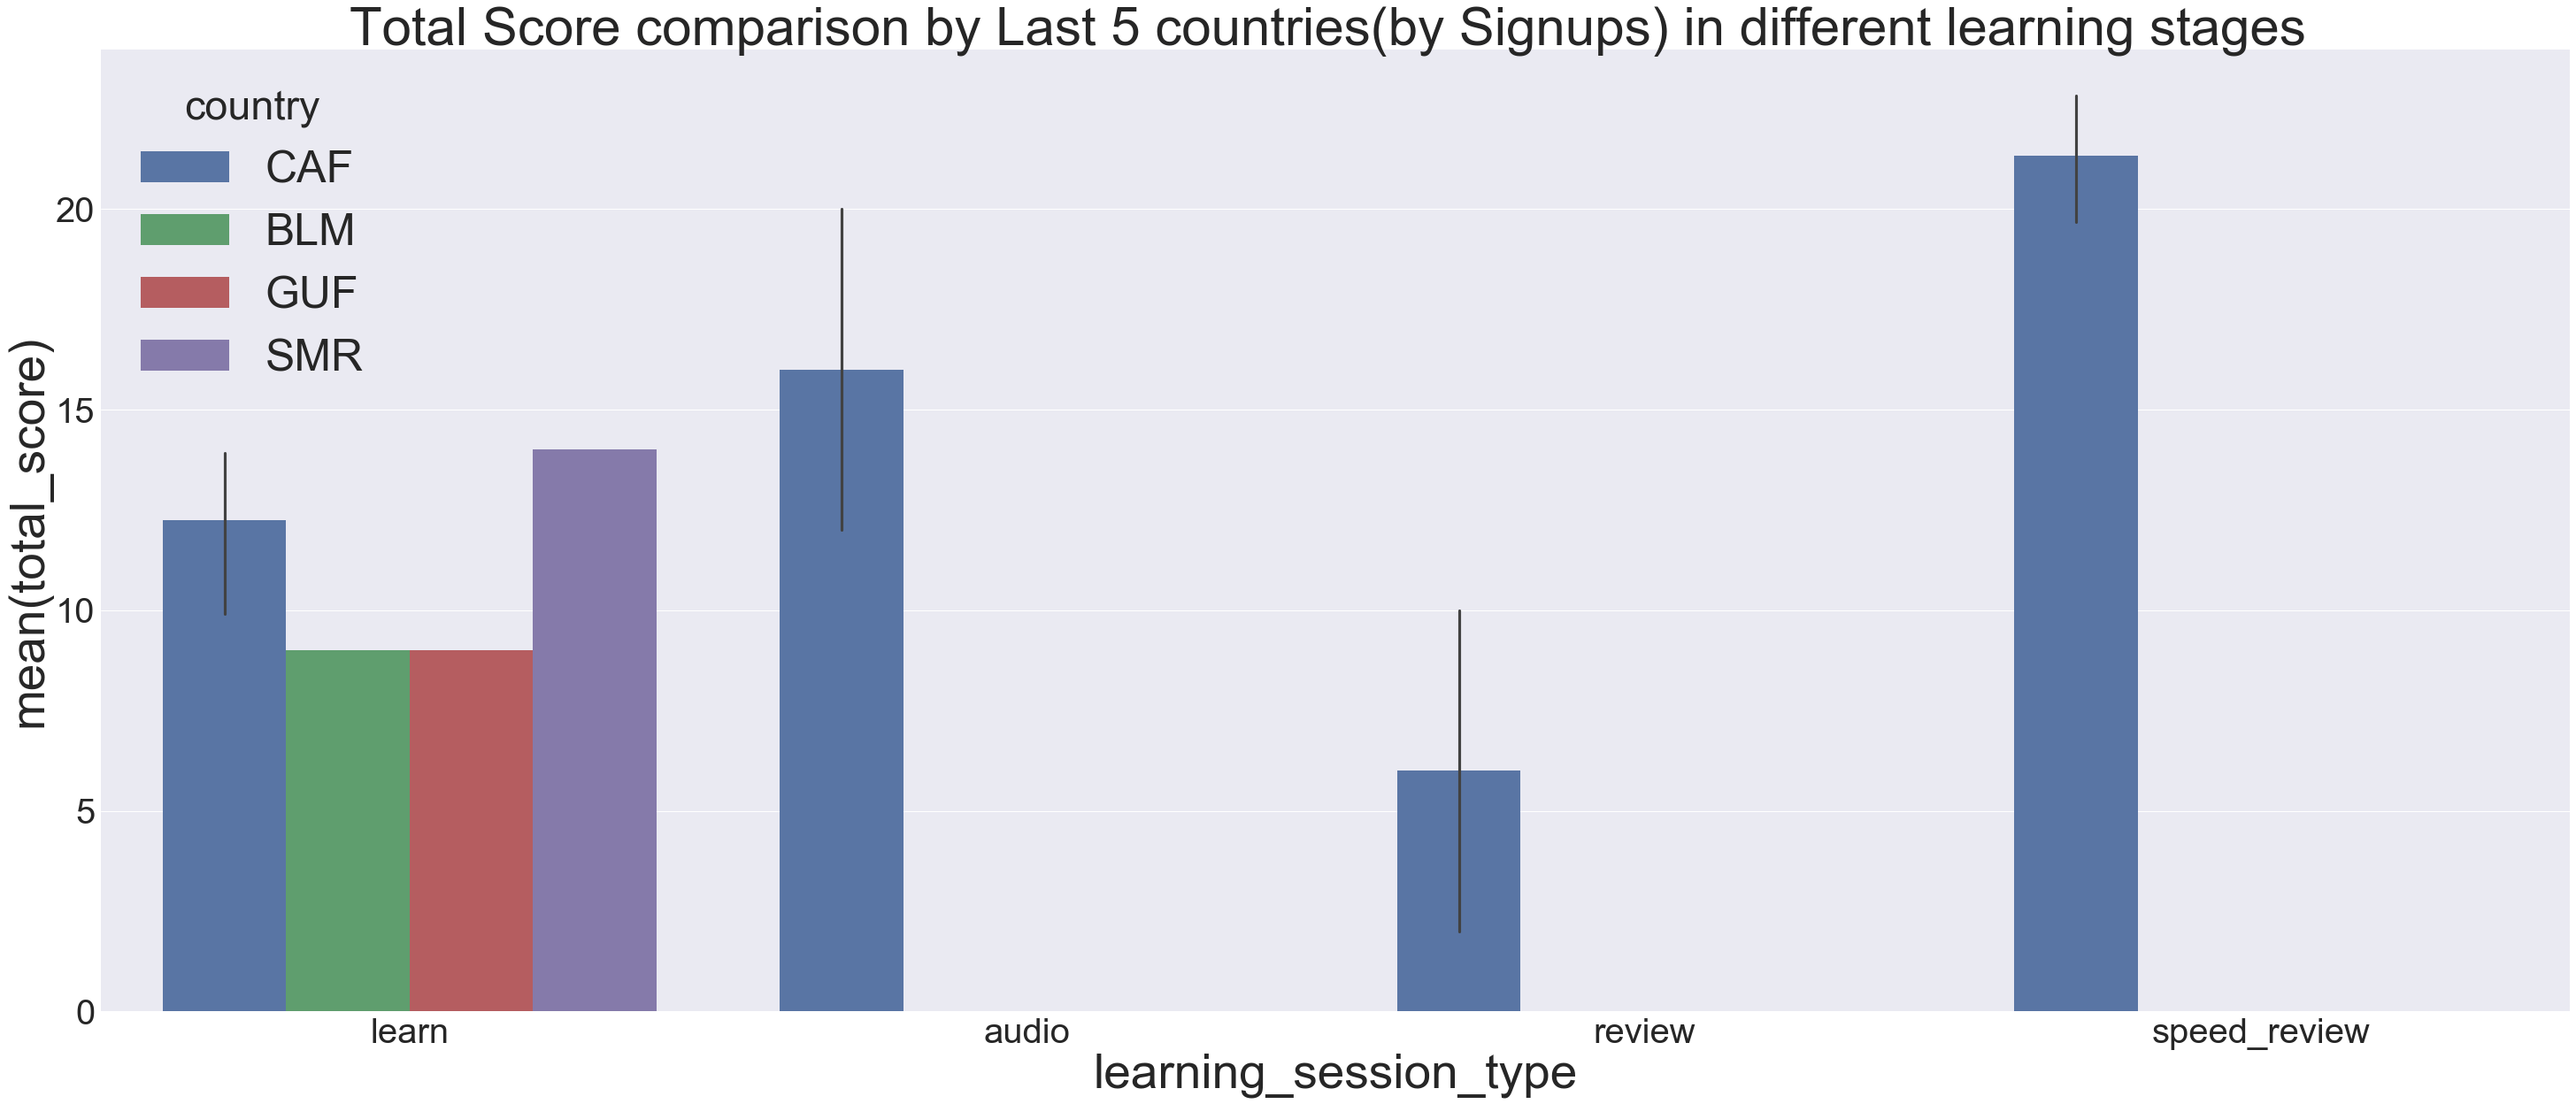

In [218]:
plt.figure(figsize=(50,20))
sns.set(font_scale=5)
plt.title('Total Score comparison by Last 5 countries(by Signups) in different learning stages ')
sns.barplot(y='total_score', x='learning_session_type', hue='country', data=last_5_countries).tick_params(labelsize=40)

### Linking subscriptions to users of different countries

In [51]:
subscriptions_countries_learnings = countries_learnings.merge(subscriptions, on='user_id', how='left')

In [53]:
subscriptions_countries_learnings = subscriptions_countries_learnings.dropna()

In [72]:
subscriptions_countries_learnings.head(1)

,user_id,learning_session_id,learning_session_type,app,total_score,num_tests,start_time,completion_time,duration_mins,country,signup_app,signup_time,period_months,action,action_time
22,6381fafe067d5255e13949f9f5959b8a,682f2e37-696c-4990-a78f-5f8b4babf68f,review,memrise-web,10.000,10.000,2018-02-14 21:49:34.030000,2018-02-14 21:51:00.588000,1.333,HRV,memrise-ios,2018-02-14 08:39:54.000000,12.000,started,2018-02-16 19:03:57.549000


In [117]:
grouped_subscriptions_countries = subscriptions_countries_learnings.groupby(['country']).user_id.apply(lambda x: len(x.unique())).reset_index()

In [119]:
sorted_subscriptions = grouped_subscriptions_countries.sort_values(['user_id'], ascending = False).reset_index(drop=True)

In [174]:
print(" Top 5 countries by subscribed users ")
sorted_subscriptions[:5]

 Top 5 countries by subscribed users 


,country,user_id
0,USA,565
1,RUS,227
2,GBR,208
3,DEU,173
4,BRA,118


In [175]:
print(" Least 5 countries by subscribed users ")
sorted_subscriptions[-5:]

 Least 5 countries by subscribed users 


,country,user_id
82,DZA,1
83,MDA,1
84,FJI,1
85,PAN,1
86,MLT,1


#### Seperating by subscription type

In [183]:
subscription_started = subscriptions_countries_learnings.loc[subscriptions_countries_learnings['action']== 'started']

In [184]:
subscription_trial_started = subscriptions_countries_learnings.loc[subscriptions_countries_learnings['action']== 'trial_started']

### Did the 2 different subscription users have statistical significance in their learning performance ? 

In [186]:
stats.kruskal(subscription_started['total_score'], subscription_trial_started['total_score'])

KruskalResult(statistic=1927.7284447869076, pvalue=0.0)

In [187]:
stats.kruskal(subscription_started['num_tests'], subscription_trial_started['num_tests'])

KruskalResult(statistic=2185.7218537618637, pvalue=0.0)

In [188]:
stats.kruskal(subscription_started['duration_mins'], subscription_trial_started['duration_mins'])

KruskalResult(statistic=1045.2906252922439, pvalue=2.5699919957991968e-229)

In [189]:
print(" There was significant difference in performance of users who had trials subscription vs started subscription")

 There was significant difference in performance of users who had trials subscription vs started subscription


In [194]:
period_1_month = subscriptions_countries_learnings.loc[subscriptions_countries_learnings['period_months']== 1.0]
period_3_months = subscriptions_countries_learnings.loc[subscriptions_countries_learnings['period_months']== 3.0]
period_12_months = subscriptions_countries_learnings.loc[subscriptions_countries_learnings['period_months']== 12.0]

### Is there a statistical difference in performance between users who have longer subscriptions ?

In [196]:
stats.kruskal(period_1_month['total_score'], period_3_months['total_score'], period_12_months['total_score'])

KruskalResult(statistic=76.143936799276631, pvalue=2.9211523570673071e-17)

In [197]:
stats.kruskal(period_1_month['num_tests'], period_3_months['num_tests'], period_12_months['num_tests'])

KruskalResult(statistic=89.944993486187499, pvalue=2.9423398047589213e-20)

In [198]:
stats.kruskal(period_1_month['duration_mins'], period_3_months['duration_mins'], period_12_months['duration_mins'])

KruskalResult(statistic=51.471026765839603, pvalue=6.6559269806849043e-12)

In [199]:
print(" There was significant difference in performance of users having different subscription periods")

 There was significant difference in performance of users having different subscription periods


# Building Prediction Modelling

Since we have established before that learning session types is statistically significantly different for the three paramaters of : Total Score, Number of Tests Done, Duration spent, we will consider these as our primary features to build and algorithm to try and predict the accuracy of the learning session that they are in

### Applying Both Regression and Classification Approaches to see which model performs best

In [141]:
from sklearn import cross_validation, linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

import time

In [127]:
lr = linear_model.LogisticRegression()
rf = RandomForestClassifier()
ds = DecisionTreeClassifier()
nb = GaussianNB()
knn = KNeighborsClassifier()

In [123]:
features = learnings[['total_score','num_tests','duration_mins']]
target = learnings[['learning_session_type']]

In [124]:
## Split data into training and testing sets.
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=None)

### Using K- Fold Cross Validation for the best performing model evaluation

In [128]:
cv_range =  list(range(2, 11))
k_scores_lr = []
k_scores_rf = []
k_scores_ds = []
k_scores_nb = []
k_scores_knn = []

#### Using Logistic Regression

Mean score  0.758072952817

Time taken for training and testing using logistic regression 3324.1397409439087


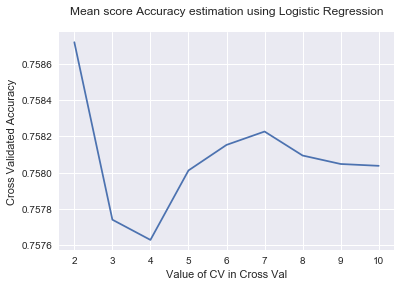

In [142]:
start = time.time()
for cv in cv_range:
    scores = cross_val_score(lr ,features, target, cv=cv, scoring='accuracy')
    k_scores_lr.append(scores.mean())
    
print("Mean score ",sum(k_scores_lr)/len(k_scores_lr))
plt.plot(cv_range, k_scores_lr)
plt.xlabel('Value of CV in Cross Val')
plt.ylabel('Cross Validated Accuracy')
plt.title('Mean score Accuracy estimation using Logistic Regression\n')
end = time.time()
print("\nTime taken for training and testing using logistic regression",end - start)

#### Using Decision Tree

Mean score  0.810471775814

Time taken for training and testing using Decision Tree 393.7090082168579


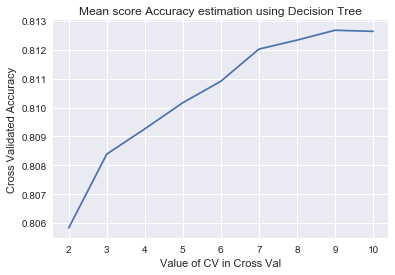

In [143]:
start = time.time()
for cv in cv_range:
    scores = cross_val_score(ds ,features, target, cv=cv, scoring='accuracy')
    k_scores_ds.append(scores.mean())
    
print("Mean score ",sum(k_scores_ds)/len(k_scores_ds))
plt.plot(cv_range, k_scores_ds)
plt.xlabel('Value of CV in Cross Val')
plt.ylabel('Cross Validated Accuracy')
plt.title('Mean score Accuracy estimation using Decision Tree')
end = time.time()
print("\nTime taken for training and testing using Decision Tree",end - start)

#### Using Random Forest

Mean score  0.811521930231

Time taken for training and testing using Random Forest 1646.7837200164795


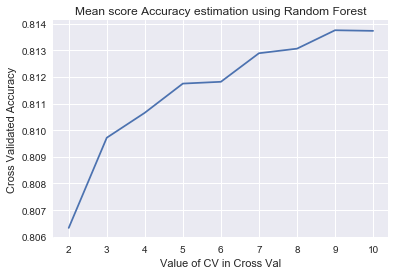

In [144]:
start = time.time()
for cv in cv_range:
    scores = cross_val_score(rf ,features, target, cv=cv, scoring='accuracy')
    k_scores_rf.append(scores.mean())
    
print("Mean score ",sum(k_scores_rf)/len(k_scores_rf))
plt.plot(cv_range, k_scores_rf)
plt.xlabel('Value of CV in Cross Val')
plt.ylabel('Cross Validated Accuracy')
plt.title('Mean score Accuracy estimation using Random Forest')
end = time.time()
print("\nTime taken for training and testing using Random Forest",end - start)

#### Using Naive Bayes

Mean score  0.546411427968

Time taken for training and testing using Naive Bayes 189.86357402801514


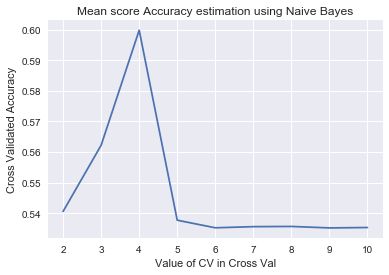

In [146]:
start = time.time()
for cv in cv_range:
    scores = cross_val_score(nb ,features, target, cv=cv, scoring='accuracy')
    k_scores_nb.append(scores.mean())
    
print("Mean score ",sum(k_scores_nb)/len(k_scores_nb))
plt.plot(cv_range, k_scores_nb)
plt.xlabel('Value of CV in Cross Val')
plt.ylabel('Cross Validated Accuracy')
plt.title('Mean score Accuracy estimation using Naive Bayes')
end = time.time()
print("\nTime taken for training and testing using Naive Bayes",end - start)

#### Using K Nearest Neighbours

start = time.time()
k_range =  range(3,15,2)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn ,features, target, cv=10, scoring='accuracy')
    k_scores_knn.append(scores.mean())
    
print("Mean score ",sum(k_scores_knn)/len(k_scores_knn))
plt.plot(k_range, k_scores_knn)
plt.xlabel('Value of CV in Cross Val')
plt.ylabel('Cross Validated Accuracy')
plt.title('Mean score Accuracy estimation using K Nearest Neighbours')
end = time.time()
print("\nTime taken for training and testing using K Nearest Neighbour",end - start)

In [201]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
print('Scores with k= 5',knn.fit(features_train, target_train).score(features_test,target_test))
end = time.time()
print("\nTime taken for training and testing using K Nearest Neighbour",end - start)

0.75969090534485606

In [ ]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors=7)
print('Scores with k= 5',knn.fit(features_train, target_train).score(features_test,target_test))
end = time.time()
print("\nTime taken for training and testing using K Nearest Neighbour",end - start)

In [ ]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors=9)
print('Scores with k= 5',knn.fit(features_train, target_train).score(features_test,target_test))
end = time.time()
print("\nTime taken for training and testing using K Nearest Neighbour",end - start)

In [ ]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors=11)
print('Scores with k= 5',knn.fit(features_train, target_train).score(features_test,target_test))
end = time.time()
print("\nTime taken for training and testing using K Nearest Neighbour",end - start)

## Applying Ensemble approaches to improve performance of the model

## Gradient Tree Boosting
Gradient Tree Boosting or Gradient Boosted Regression Trees (GBRT) is a generalization of boosting to arbitrary differentiable loss functions. GBRT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems. Gradient Tree Boosting models are used in a variety of areas including Web search ranking and ecology.

The advantages of GBRT are:

Natural handling of data of mixed type (= heterogeneous features)
Predictive power
Robustness to outliers in output space (via robust loss functions)
The disadvantages of GBRT are:

Scalability, due to the sequential nature of boosting it can hardly be parallelized.
The module sklearn.ensemble provides methods for both classification and regression via gradient boosted regression trees.

In [234]:
start = time.time()
from sklearn.ensemble import GradientBoostingClassifier

g = GradientBoostingClassifier(n_estimators=10)

g.fit(features, target)

g.score(features, target)

end = time.time()
print("\nTime taken for training and testing using Gradient Tree Boosting",end - start)

0.80080454766976072

### Multioutput Classifier 

In [235]:
start = time.time()
from sklearn.multioutput import MultiOutputClassifier
MultiOutputClassifier(
    GradientBoostingClassifier(random_state=0)
   ).fit(features_train,target_train).score(features_test,target_test)
end = time.time()
print("\nTime taken for training and testing using Multioutput Classifier",end - start)

0.82317168428512244

Conclusion: The ensemble model of multioutput classifier performs the best, while in the normal model, Random Forest has the best performance